Group:
- Ali Alavizadeh
- Ali Janloo
- Amir Ali Akhgari

Adam (Adaptive Moment Estimation) is an optimization algorithm used in training machine learning models, particularly neural networks. Introduced by Diederik P. Kingma and Jimmy Ba in their 2014 paper "Adam: A Method for Stochastic Optimization," Adam combines the advantages of two other popular optimization methods: AdaGrad (Adaptive Gradient Algorithm) and RMSProp (Root Mean Square Propagation).

### Key Features of Adam:
1. **Adaptive Learning Rates:** Adam computes adaptive learning rates for each parameter. This is beneficial because it helps to handle sparse gradients and adjusts the learning rates during training.

2. **Momentum:** Adam incorporates momentum by using exponentially moving averages of past gradients (similar to the momentum method) to accelerate convergence.

### Adam Algorithm Steps:

1. **Initialize Parameters:**
   - Learning rate $\alpha$ (default is 0.001)
   - Exponential decay rates for the moment estimates $\beta_1$ and $\beta_2$ (common values are 0.9 and 0.999, respectively)
   - Small constant $\epsilon$ to prevent division by zero (default is $10^{-8}$)
   - Initialize first moment vector $m_0 = 0$ and second moment vector $v_0 = 0$

2. **Update Rule:**
   For each parameter $\theta_t$:
   - Compute the gradients: $g_t = \nabla_{\theta} J(\theta_{t-1})$
   - Update biased first moment estimate:
     $$
     m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
     $$
   - Update biased second moment estimate:
     $$
     v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
     $$
   - Compute bias-corrected first moment estimate:
     $$
     \hat{m}_t = \frac{m_t}{1 - \beta_1^t}
     $$
   - Compute bias-corrected second moment estimate:
     $$
     \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
     $$
   - Update parameters:
     $$
     \theta_t = \theta_{t-1} - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
     $$

### Benefits of Adam:
- **Fast Convergence:** Adam converges faster than standard gradient descent.
- **Efficient Computation:** It is computationally efficient and has low memory requirements.
- **Adaptive:** Adjusts learning rates for each parameter, which is useful for dealing with non-stationary objectives.
- **Robustness:** Performs well in practice on a wide range of neural network architectures and problems.

Step 1, Loss: 3.699329920171105, Parameters: [0.195949834012616, 0.829291671982644, 0.16590562779504248, 0.7281466136468927, 0.8851086797245709, 0.6833966459201538, 0.41898992080838715, -0.033925735687258055, 0.37241378954118953, 0.3382559473577287]
Step 2, Loss: 2.072533867324672, Parameters: [0.09729283767701365, 0.7305525116966298, 0.06728729851247928, 0.6294202935882012, 0.7863733105869778, 0.584650557515801, 0.32034063786873107, -0.1325235123887969, 0.2737343629235555, 0.23961261936341116]
Step 3, Loss: 0.9718908991014207, Parameters: [0.0015170465821829349, 0.6344876636873914, -0.028351362665608754, 0.5334004218316403, 0.6903217251801431, 0.4885615088985473, 0.22459215599864618, -0.22808897194414623, 0.1778793180466295, 0.1438851821240309]
Step 4, Loss: 0.36489654523307896, Parameters: [-0.08913742977577804, 0.5431242564222061, -0.11866716617200297, 0.44214693440100333, 0.598990675013054, 0.39713917674731336, 0.13400505092982018, -0.3182232486399909, 0.08702967049171348, 0.053349

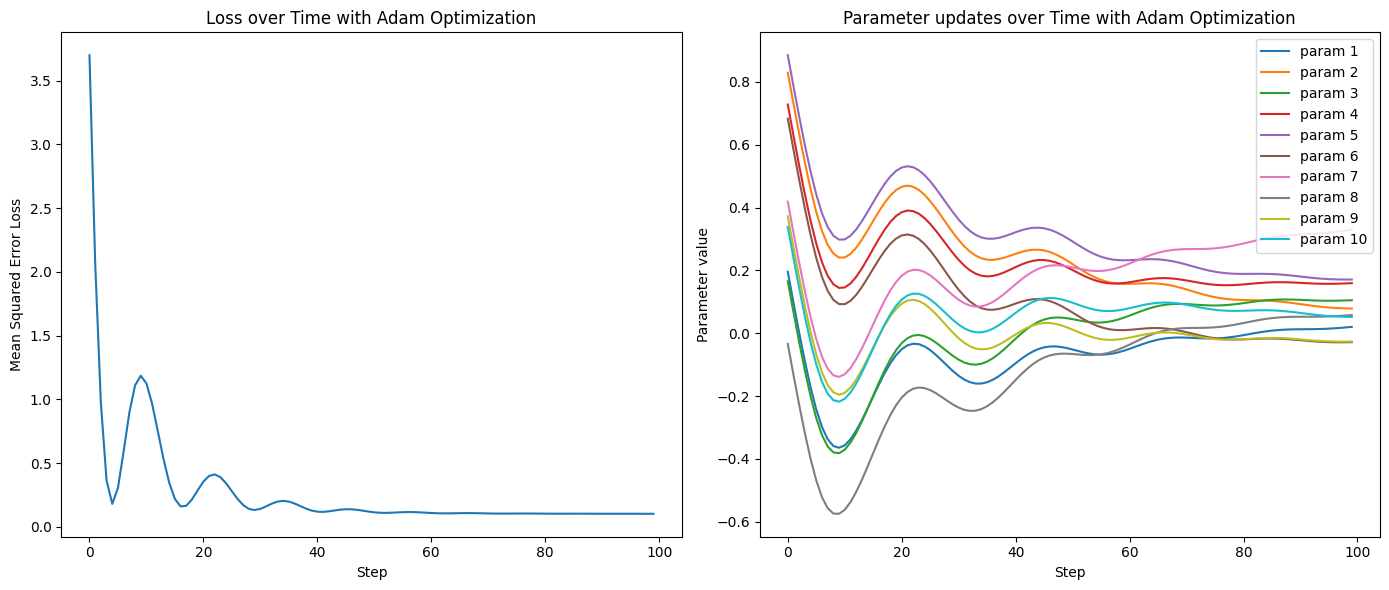

In [37]:
import numpy as np
import matplotlib.pyplot as plt

class AdamOptimizer:
    def __init__(self, params, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.params = params
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = [np.zeros_like(p) for p in params]
        self.v = [np.zeros_like(p) for p in params]
        self.t = 0

    def step(self, grads):
        self.t += 1
        updated_params = []
        for i, (param, grad) in enumerate(zip(self.params, grads)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (grad ** 2)
            m_hat = self.m[i] / (1 - self.beta1 ** self.t)
            v_hat = self.v[i] / (1 - self.beta2 ** self.t)
            param_update = self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
            updated_params.append(param - param_update)
        self.params = updated_params

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_gradients(X, y_true, params):
    y_pred = np.dot(X, params)
    error = y_pred - y_true
    grads = 2 * np.dot(X.T, error) / len(y_true)
    return grads

# Example usage
np.random.seed(0)
X = np.random.rand(100, 10)  # 100 samples, 10 features
y_true = np.random.rand(100)  # 100 true values
params = np.random.rand(10)  # 10 initial parameters
adam = AdamOptimizer(params, lr=0.1)

losses = []
param_history = []

# Simulate optimization over 100 steps
for step in range(100):
    grads = compute_gradients(X, y_true, adam.params)
    adam.step(grads)
    y_pred = np.dot(X, adam.params)
    current_loss = mean_squared_error(y_true, y_pred)
    losses.append(current_loss)
    param_history.append(np.copy(adam.params))
    print(f'Step {step+1}, Loss: {current_loss}, Parameters: {adam.params}')

# Plot the loss over the training steps
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Mean Squared Error Loss')
plt.title('Loss over Time with Adam Optimization')

# Plot the parameter updates
param_history = np.array(param_history)
plt.subplot(1, 2, 2)
for i in range(param_history.shape[1]):
    plt.plot(param_history[:, i], label=f'param {i + 1}')
plt.xlabel('Step')
plt.ylabel('Parameter value')
plt.title('Parameter updates over Time with Adam Optimization')
plt.legend()

plt.tight_layout()
plt.show()


# Momentum vs. AdaDelta vs. Adam

In [7]:
class MomentumOptimizer:
    def __init__(self, params, lr=0.001, momentum=0.9):
        self.params = params
        self.lr = lr
        self.momentum = momentum
        self.velocity = [np.zeros_like(p) for p in params]

    def step(self, grads):
        updated_params = []
        for i, (param, grad) in enumerate(zip(self.params, grads)):
            self.velocity[i] = self.momentum * self.velocity[i] - self.lr * grad
            updated_params.append(param + self.velocity[i])
        self.params = updated_params


In [33]:
class AdadeltaOptimizer:
    def __init__(self, params, lr=1.0, rho=0.95, epsilon=1e-6):
        self.params = params
        self.lr = lr
        self.rho = rho
        self.epsilon = epsilon
        self.E_g2 = [np.zeros_like(param) for param in params]
        self.E_dx2 = [np.zeros_like(param) for param in params]

    def step(self, grads):
        updates = []
        for i, (param, grad) in enumerate(zip(self.params, grads)):
            self.E_g2[i] = self.rho * self.E_g2[i] + (1 - self.rho) * grad**2
            rms_dx = np.sqrt(self.E_dx2[i] + self.epsilon)
            rms_g = np.sqrt(self.E_g2[i] + self.epsilon)
            delta_x = - (rms_dx / rms_g) * grad
            self.E_dx2[i] = self.rho * self.E_dx2[i] + (1 - self.rho) * delta_x**2
            param += delta_x
            updates.append(param)
        self.params = updates


In [9]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_gradients(X, y_true, params):
    y_pred = np.dot(X, params)
    error = y_pred - y_true
    grads = 2 * np.dot(X.T, error) / len(y_true)
    return grads


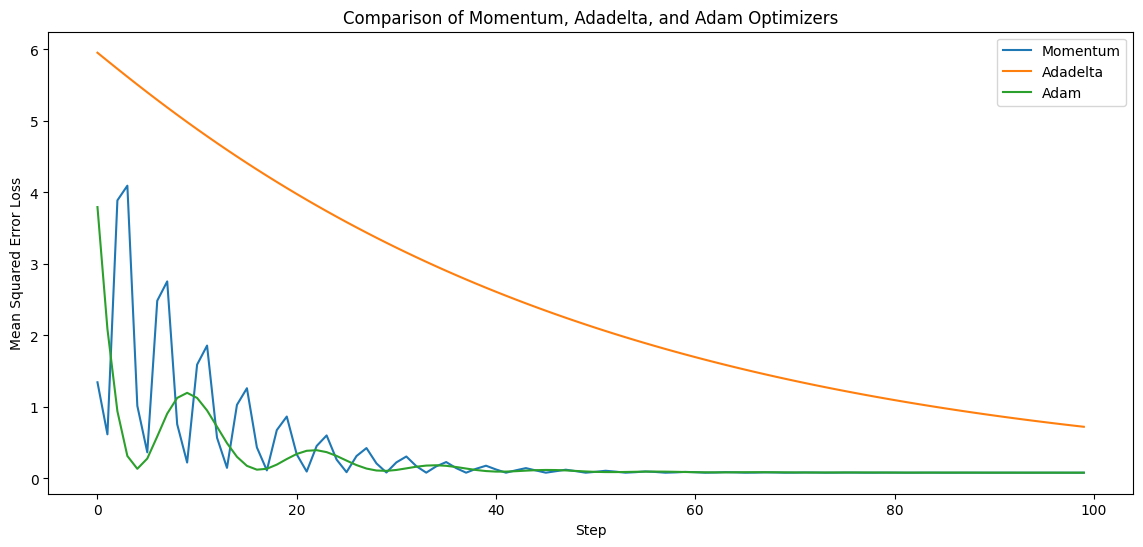

In [39]:
np.random.seed(43)
X = np.random.rand(100, 10)  # 100 samples, 3 features
y_true = np.random.rand(100)  # 100 true values

# Initial parameters
initial_params = np.random.rand(10)

# Optimizers
momentum_optimizer = MomentumOptimizer(np.copy(initial_params), lr=0.1, momentum=0.9)
adadelta_optimizer = AdadeltaOptimizer(np.copy(initial_params), lr=1.0)
adam_optimizer = AdamOptimizer(np.copy(initial_params), lr=0.1)

# Store losses for each optimizer
losses_momentum = []
losses_adadelta = []
losses_adam = []

# Number of steps for optimization
steps = 100

for step in range(steps):
    # Momentum
    grads = compute_gradients(X, y_true, momentum_optimizer.params)
    momentum_optimizer.step(grads)
    y_pred = np.dot(X, momentum_optimizer.params)
    current_loss = mean_squared_error(y_true, y_pred)
    losses_momentum.append(current_loss)
    
    # Adadelta
    grads = compute_gradients(X, y_true, adadelta_optimizer.params)
    adadelta_optimizer.step(grads)
    y_pred = np.dot(X, adadelta_optimizer.params)
    current_loss = mean_squared_error(y_true, y_pred)
    losses_adadelta.append(current_loss)
    
    # Adam
    grads = compute_gradients(X, y_true, adam_optimizer.params)
    adam_optimizer.step(grads)
    y_pred = np.dot(X, adam_optimizer.params)
    current_loss = mean_squared_error(y_true, y_pred)
    losses_adam.append(current_loss)

# Plot the losses
plt.figure(figsize=(14, 6))
plt.plot(losses_momentum, label='Momentum')
plt.plot(losses_adadelta, label='Adadelta')
plt.plot(losses_adam, label='Adam')
plt.xlabel('Step')
plt.ylabel('Mean Squared Error Loss')
plt.title('Comparison of Momentum, Adadelta, and Adam Optimizers')
plt.legend()
plt.show()
